<a href="https://colab.research.google.com/github/rafsanalhad/machine_learning_jobsheet/blob/main/Pertemuan3_Praktikum2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [2]:
# Melakukan import dataset menggunakan pandas

df = pd.read_csv("Posisi_gaji.csv")

X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

In [3]:
# Melakukan feature scaling

sc_X = StandardScaler()
sc_y = StandardScaler()

# Melakukan fitting dan transformasi terhadap feature scaling
X = sc_X.fit_transform(X.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))


In [4]:
# Melakukan fitting model dengan algoritma SVR

regressor = SVR(kernel="rbf")
regressor.fit(X, y)


# Penjelasan kode diatas
# regressor = SVR(kernel="rbf") digunakan untuk menginisialisasi objek baru SVR dengan kernel rbf
# regressor.fit(X, y) digunakan untuk melakukan fitting model dengan data X dan y

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

<ipython-input-5-1a6338755558>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)


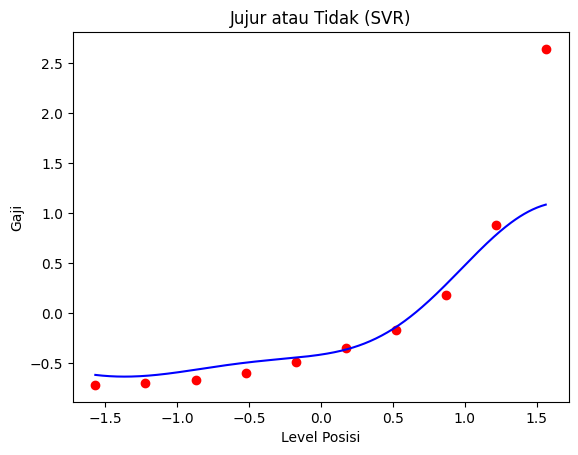

In [5]:
# Visualisasi hasil model SVR

X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)

plt.scatter(X, y, color="red")
plt.plot(X_grid, regressor.predict(X_grid), color="blue")
plt.title("Jujur atau Tidak (SVR)")
plt.xlabel("Level Posisi")
plt.ylabel("Gaji")
plt.show()

In [6]:
# Melakukan prediksi hasil

# Membuat array 2D yang digunnakan untuk melakukan prediksi
tingkat_posisi_prediksi = np.array([[6.5]])

# Penskalaan data yang akan diprediksi
tingkat_posisi_prediksi = sc_X.transform(tingkat_posisi_prediksi)

# Melakukan prediksi menggunakan model SVR
gaji_prediksi = regressor.predict(tingkat_posisi_prediksi)

# Mengembalikan hasil prediksi ke skala aslinya
gaji_prediksi = sc_y.inverse_transform(gaji_prediksi.reshape(-1, 1))

In [7]:
print("Prediksi Gaji untuk Tingkat Posisi 6.5:", gaji_prediksi[0])

Prediksi Gaji untuk Tingkat Posisi 6.5: [170370.0204065]


In [8]:
# Evaluasi model

# Import objek metrics dari library sklearn
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_actual = y
y_pred = regressor.predict(X)

# Penjelasan kode diatas
# regressor.predict digunakan untuk melakukan prediksi terhadap data X


# Menghitung Mean Absolute Error (MAE)
mae = mean_absolute_error(y_actual, y_pred)

# Menghitung Mean Squared Error (MSE)
mse = mean_squared_error(y_actual, y_pred)


# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung R2 Score
r2_square = r2_score(y_actual, y_pred)

# Melakukan print terhadap hasil evaluasi
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2_square)

MAE: 0.22299274095734414
MSE: 0.24839989293792014
RMSE: 0.4983973243687411
R-squared: 0.7516001070620798
